In [1]:
from glob import glob
from gzip import open # NB: overrides standard open()
import os
import math
import functools
import numpy as np
import scipy.interpolate
from scipy import interpolate
import pandas as pd
import pickle as pkl

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

##### Возможно ранее я где-то совершил ошибку при интерполировании сигналов рассеяния, поэтому, пройду весь путь сначала

In [12]:
fds = sorted(os.listdir('C:/Users/admin/Desktop/курсовая 2.0/X — копия/')) 
#формируем список файлов x для считывания в цикле
xw = pd.read_csv('C:/Users/admin/Desktop/курсовая 2.0/X — копия/01.txt',sep='\t')
colums=list(xw.columns.values) #установил имена колонок
rows=list(xw.index.values)  #установил имена строчек

In [13]:
X=np.zeros([35,206,55]) #инициализирую массив нулей

In [14]:
# X = the predictors, a tensor
# dimensions: (sample, emission wavelength, excitation wavelength)

# first read the text files individually
# make sure to sort the list of files, they must correspond to rows in y
X_ = [pd.read_csv(f, sep='\t') for f in sorted(glob('C:/Users/admin/Desktop/курсовая 2.0/X — копия/??.txt'))]
# sanity check: wavelengths must be the same in all files
for x in X_[1:]:
	# errors will also happen if any of the files have different dimensions
	if not ((x.axes[0] == X_[0].axes[0]).all() and (x.axes[1] == X_[0].axes[1]).all()):
		# it doesn't quite matter what we raise here
		# the important thing is to complain loudly and crash
		raise Exception(x.axes)

In [15]:
# Считаем наши данные в наш тензор
for i in range(0,35):
    x = pd.read_csv('C:/Users/admin/Desktop/курсовая 2.0/X — копия/'+fds[i],sep='\t')
    x = x.fillna(0)
    x = x.replace(',','.', regex=True) #меняю ',' на '.'
    x = x.astype(float) #конвертирую из string в float
    X[i,:,:]=np.array(x)

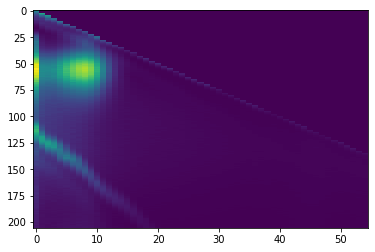

In [21]:
plt.imshow(X[34,:,:],aspect='auto')
plt.show()

In [124]:
ll=xw.columns.values #колонки
lrl=xw.index.values #строчки
lrl=lrl.astype(float)
ll=ll.astype(float)
Xw=np.zeros([206,55]) #инициализирую массив нулей
cons=3400
def lo(t):
    return  1/((1/t) - (cons/1e7))
for i in range(0,206):
    for j in range(0,55):
        if (
                (math.fabs((2*ll[j])-(lrl[i]))<30) or 
                (math.fabs(ll[j]-(lrl[i]))<30) or
                (math.fabs((2*lrl[i])-(lo(ll[j])))<30) or 
                (math.fabs(lrl[i]-lo(ll[j]))<30)):
            Xw[i,j]=1.0  #собираю булеву матрицу

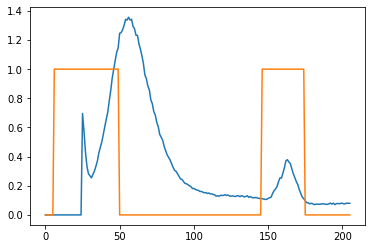

In [125]:
plt.plot(X[34,:,10])
plt.plot(Xw[:,10])
plt.show();

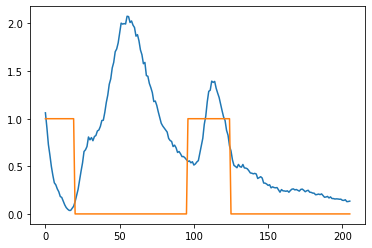

In [126]:
plt.plot(X[34,:,0])
plt.plot(Xw[:,0])
plt.show();

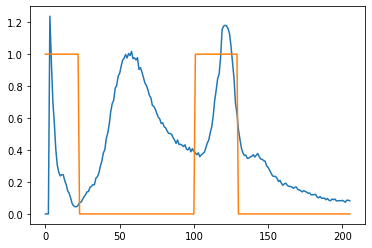

In [127]:
plt.plot(X[34,:,1])
plt.plot(Xw[:,1])
plt.show();

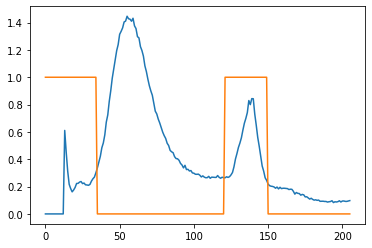

In [128]:
plt.plot(X[34,:,5])
plt.plot(Xw[:,5])
plt.show();

##### Как видно из графиков, иногда интерполяционный коридор слишком широкий, а иногда, наоборот, слишком узкий, поэтому, напишу функцию, которая подгоняет эту ширину

In [129]:
def function_1 (data, bool_vector, relation):
    for i in range(0,len(bool_vector)-1):
        if data[i]==0:
            bool_vector[i]=0
            continue
        if (bool_vector[i]==1) and (bool_vector[i+1]==0):
            while data[i]<=data[i+1]:
                bool_vector[i]=0
                i-=1
            if ((data[i]/data[i+1])>=relation):
                bool_vector[i+1]=1
    return bool_vector

In [130]:
for i in range(0,35):
    Xw[:,i]=function_1(X[34,:,i],Xw[:,i],1.01)

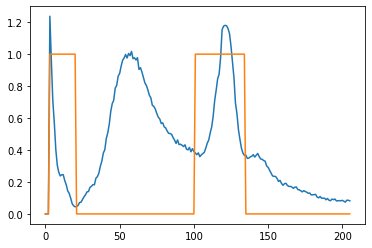

In [131]:
plt.plot(X[34,:,1])
plt.plot(Xw[:,1])
plt.show();

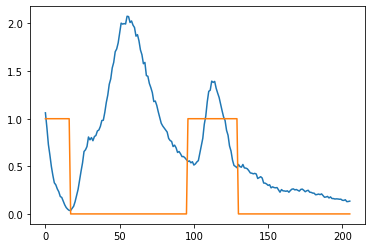

In [132]:
plt.plot(X[34,:,0])
plt.plot(Xw[:,0])
plt.show();

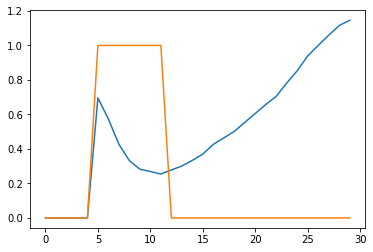

In [136]:
plt.plot(X[34,20:50,10])
plt.plot(Xw[20:50,10])
plt.show();

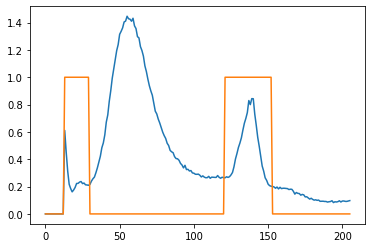

In [134]:
plt.plot(X[34,:,5])
plt.plot(Xw[:,5])
plt.show();